<a href="https://colab.research.google.com/github/AyalaBouhnik/Stroke-Prediction/blob/main/stoke_pridiction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# New Section

# New Section

In [ ]:
data.shape


(5110, 12)

In [ ]:
data.info


<bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [ ]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data['bmi'].value_counts()


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
data['bmi'].describe()


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
# filling null values in 'bmi' column in data

data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [ ]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# dropping the unnecessary columns

data.drop('id', axis = 1, inplace = True)
data.drop('ever_married', axis = 1, inplace = True)



In [ ]:
data.shape


(5110, 10)

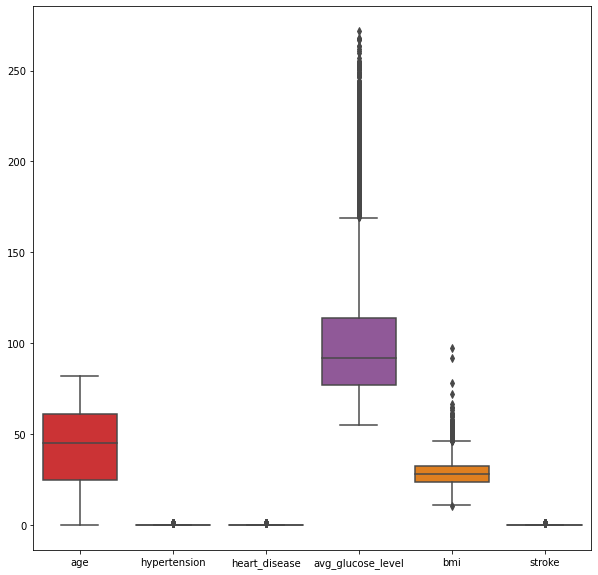

In [ ]:
# checking for outliers 

fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = data, palette = 'Set1')
plt.show();

In [ ]:
print(data['avg_glucose_level'].describe())
print('Count of outliers in the avarage of glucose level = ', data[data['avg_glucose_level'] > 114].shape[0] )

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
Count of outliers in the avarage of glucose level =  1282


In [ ]:
data['bmi'].describe()


count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
outliers_glucose = data['avg_glucose_level'].quantile(0.78)
outliers_bmi = data['bmi'].quantile(0.98)
print("Quantile limit for avg_glucose level = ", outliers_glucose)
print("Quantile limit for bmi = ", outliers_bmi)

Quantile limit for avg_glucose level =  119.672
Quantile limit for bmi =  48.08199999999997


In [ ]:
# removing outliers 

filtered_data = data[data['avg_glucose_level'] < outliers_glucose]
filtered_data = filtered_data[filtered_data['bmi'] < outliers_bmi]

In [ ]:
data.shape


(5110, 10)

In [ ]:
# performing encoding (label encoding)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

gender = encoder.fit_transform( filtered_data['gender'] )
smoking_status = encoder.fit_transform( filtered_data['smoking_status'] )
work_type = encoder.fit_transform( filtered_data['work_type'] )
Residence_type = encoder.fit_transform( filtered_data['Residence_type'] )
filtered_data['work_type'] = work_type
filtered_data['Residence_type'] = Residence_type
filtered_data['smoking_status'] = smoking_status
filtered_data['gender'] = gender
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3915 entries, 2 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3915 non-null   int64  
 1   age                3915 non-null   float64
 2   hypertension       3915 non-null   int64  
 3   heart_disease      3915 non-null   int64  
 4   work_type          3915 non-null   int64  
 5   Residence_type     3915 non-null   int64  
 6   avg_glucose_level  3915 non-null   float64
 7   bmi                3915 non-null   float64
 8   smoking_status     3915 non-null   int64  
 9   stroke             3915 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 336.4 KB


In [ ]:
filtered_data.head()


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,2,1,58.57,24.200000,0,1


In [ ]:
x = filtered_data.drop('stroke', axis = 1)
y = filtered_data['stroke']
# splitting the dataset for train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)
x_test.shape

(783, 9)

In [ ]:
x_train.shape


(3132, 9)

In [ ]:
filtered_data.describe()


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000
mean,0.406386,41.160920,0.076117,0.038825,2.195147,0.506513,85.735458,27.893662,1.350702,0.037548
std,0.491221,22.513507,0.265220,0.193202,1.109133,0.500021,16.080463,6.625627,1.081914,0.190124
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,2.000000,0.000000,73.540000,23.300000,0.000000,0.000000
50%,0.000000,42.000000,0.000000,0.000000,2.000000,1.000000,84.930000,27.700000,2.000000,0.000000
75%,1.000000,58.000000,0.000000,0.000000,3.000000,1.000000,97.645000,31.900000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,4.000000,1.000000,119.670000,48.000000,3.000000,1.000000


In [ ]:
# Scaling the train and test features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)


In [ ]:
#Logistic regression-


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train_std, y_train)

y_pred_logistic_reg = logistic_reg.predict(x_test_std)

accuracy_logistic_reg = accuracy_score(y_test, y_pred_logistic_reg)
print("Logistic Regression accuracy = " +  str(accuracy_logistic_reg*100) + " %")

Logistic Regression accuracy = 96.29629629629629 %


In [ ]:
#SVM-

from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train_std, y_train)

y_pred_svc = svc.predict(x_test_std)

ac_svc = accuracy_score(y_test, y_pred_svc)
print("SVM accuracy = " +  str(ac_svc*100) + " %")

SVM accuracy = 96.29629629629629 %


In [ ]:
#Desicion tree-

from sklearn.tree import DecisionTreeClassifier
desicion_tree = DecisionTreeClassifier()

desicion_tree.fit(x_train_std, y_train)

DecisionTreeClassifier()

In [ ]:
desicion_tree.feature_importances_


array([0.01463991, 0.18369067, 0.0174248 , 0.01987538, 0.05457284,
       0.03082226, 0.35949691, 0.25229151, 0.06718571])

In [ ]:
x_train.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_desicion_tree = desicion_tree.predict(x_test_std)

accuracy_desicion_tree = accuracy_score(y_test, y_pred_desicion_tree)
print("decison tree accuracy = " +  str(accuracy_desicion_tree*100) + " %")

decison tree accuracy = 92.97573435504471 %


In [ ]:
#K-Nearest-Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train_std, y_train)

y_pred_knn = knn.predict(x_test_std)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K Nearest Neighbours accuracy = " +  str(accuracy_knn*100) + " %")

K Nearest Neighbours accuracy = 96.04086845466155 %


In [ ]:
import pickle

pickle.dump(logistic_reg, open('model.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))
pickle.dump(knn, open('model.pkl', 'wb'))
pickle.dump(desicion_tree, open('model.pkl', 'wb'))
